In [12]:
# 1 - Questão 10 (Lista de exercícios): normalização de valores de atributos.

data <- data.frame(row.names = 1:10, v=c(1000,2000,3000,1500,1500,1000,3000,50,4000,1000))
data$n1 <- (data$v - mean(data$v)) / sd(data$v)
data$n2 <- (data$v - min(data$v)) / (max(data$v) - min(data$v))
data$n3 <- data$v / max(data$v)

summaries = data.frame(
    row.names=c('mean', 'sd', 'min','max'), 
    v=c(mean(data$v), sd(data$v), min(data$v), max(data$v)),
    n1=c(mean(data$n1), sd(data$n1), min(data$n1), max(data$n1)),
    n2=c(mean(data$n2), sd(data$n2), min(data$n2), max(data$n2)),
    n3=c(mean(data$n3), sd(data$n3), min(data$n3), max(data$n3))
)
data
summaries

v,n1,n2,n3
1000,-0.6718125,0.2405063,0.2500
2000,0.1627372,0.4936709,0.5000
3000,0.9972868,0.7468354,0.7500
1500,-0.2545376,0.3670886,0.3750
1500,-0.2545376,0.3670886,0.3750
1000,-0.6718125,0.2405063,0.2500
3000,0.9972868,0.7468354,0.7500
50,-1.4646347,0.0000000,0.0125
4000,1.8318365,1.0000000,1.0000
1000,-0.6718125,0.2405063,0.2500


,v,n1,n2,n3
mean,1805.000,-5.572799e-18,0.4443038,0.4512500
sd,1198.251,1.000000e+00,0.3033547,0.2995628
min,50.000,-1.464635e+00,0.0000000,0.0125000
max,4000.000,1.831837e+00,1.0000000,1.0000000


In [11]:
# 2 - Questão 16 (Lista de exercícios): similaridade entre os vetores q e d e cosseno do j do ângulo θ
v1 = c(2,1)
v2 = c(2,2)
cos = sum(v1*v2) / (sqrt(sum(v1*v1)) * sqrt(sum(v2*v2)))
cos

[1] 0.9486833

# 3 - Questão 30 (Lista de exercícios)

## A - Segundo cada descritor, esta consulta deve representar um objeto pertencente a qual classe? Justifique sua resposta.

- Descritor 1: Classe 1
- Descritor 2: Classe 2
- Descritor 3: Classe 2

Em todos os casos, foi escolhida a classe do elemento mais próximo ao ponto buscado

## B - Segundo cada descritor, quais seriam os 5 vizinhos mais próximos desta consulta?


- Descritor 1: 1, 1, 1, 1 ,1
- Descritor 2: 2, 2, 1, 2, 1
- Descritor 3: 2, 2, 2, 2, 2



In [ ]:
hist_A = c(5. 5, 5, 5, 5)
hist_B=c(5,5,5,5,5)
dist = 0

In [80]:
# Extraia os histogramas de cores das imagens A, B, C e Q.
#Em seguida, calcule a distância L1 e L2 de Q para as imagens 
# A, B, C e ordene-as em relação à distância (mais relevantes antes das menos relevantes).

a=matrix(c(0,1,1,1,2,4,1,2,2,1,2,4,2,1,1,2,3,4,2,3,2,1,3,1,0), nrow=5, ncol=5)
b=matrix(c(0,0,1,3,2,1,1,3,1,4,1,3,2,0,1,3,3,3,1,1,4,2,2,1,4), nrow=5, ncol=5)
c=matrix(c(4,0,4,4,4,3,1,4,1,3,0,1,4,1,2,0,1,0,2,2,2,2,0,0,0), nrow=5, ncol=5)
d=matrix(c(1,3,3,2,2,3,2,2,3,0,3,2,4,3,1,3,4,4,0,2,2,4,0,0,2), nrow=5, ncol=5)

hist <- function(data) {
    sapply(X=0:4, function(x) { sum(data==x) } )
}
dist <- function(a, b, L) {
    sum( abs(a-b) ^ L )^(1/L)
}

a <- hist(a)
b <- hist(b)
c <- hist(c)
d <- hist(d)
a
b
c
d

dist(a, d, 1)
dist(a, d, 2)
dist(b, d, 1)
dist(b, d, 2)
dist(c, d, 1)
dist(c, d, 2)



[1] 2 9 8 3 3

[1] 3 9 4 6 3

[1] 7 5 5 2 6

[1] 4 2 8 7 4

[1] 14

[1] 8.3666

[1] 14

[1] 8.246211

[1] 16

[1] 7.483315

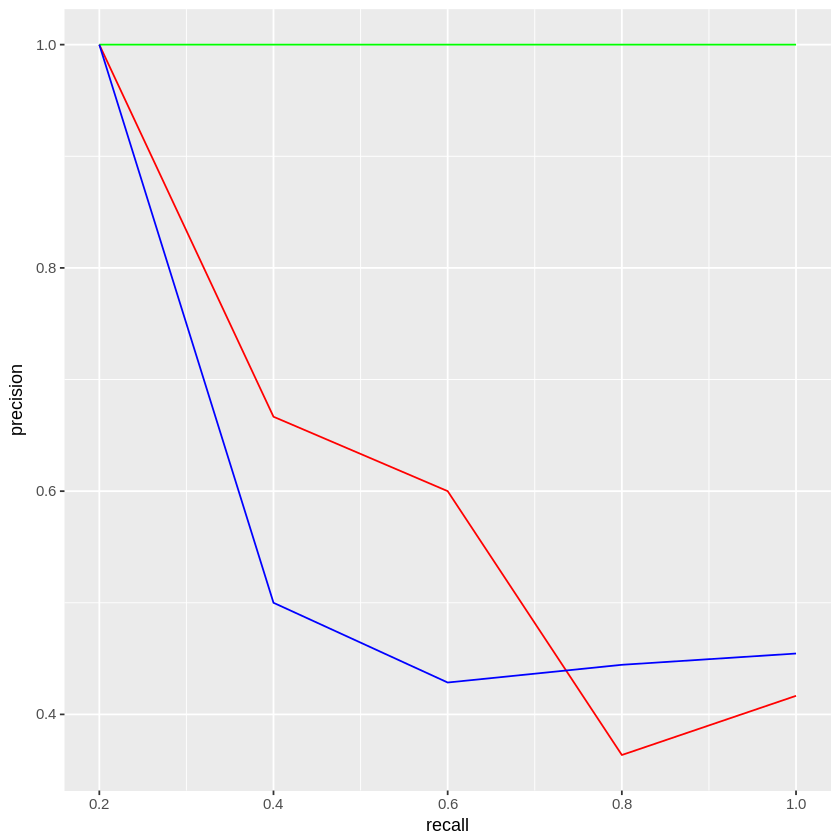

In [77]:
#install.packages("ggplot2")
library(ggplot2) 

A <- c(T,F,T,F,T,F,F,F,F,F,T,T)
B <- c(T,T,T,T,T,F,F,F,F,F,F,F)
C <- c(T,F,F,T,F,F,T,F,T,F,T,F)

precision_recall <- function(data, color) {
    precision <- c()
    recall <- c()
    for (i in 1:length(data)) {
        if (data[i]) {
            precision <- c(precision, sum(data[1:i]) / length(data[1:i]))
            recall <- c(recall, sum(data[1:i]) / sum(data))
        }
    }
    df <- data.frame(precision, recall)
    geom_line(data=df, aes(x=recall, y=precision), color=color)
}
ggplot(NULL) + precision_recall(A, 'red') + precision_recall(B, 'green') + precision_recall(C, 'blue')


In [79]:
# 8 - Considere a sequência de imagens grayscale 2x2 pixels dada abaixo. 
# Deseja-se obter uma série temporal unidimensional e univariada a partir de tal conjunto.
# Para isso, cada imagem deverá ser representada pelo valor do descritor MAXDESCRIPTOR,
# que retorna o maior valor de pixel da imagem. Em seguida, a série deverá ser
# normalizada (N(𝞵,𝞼) = N(0, 1)). Finalmente, a dimensionalidade da série normalizada
# deverá ser reduzida em 50% por meio do algoritmo PAA (Piecewise Aggregate Approximation).
# Encontre a série que deverá ser gerada após a execução dos procedimentos mencionados.

data = matrix(c(
    50,15,5,0,
    22,117,99,80,
    244,245,255,254,
    200,100,50,250,
    8,5,7,8,
    10,15,20,40,
    50,51,53,51,
    100,110,101,11),
    nrow=8, byrow=T)
data

data <- apply(data, 1, max)
data

data <- (data - mean(data)) / sd(data)
data

data <- (data[seq(1, length(data), 2)] + data[seq(2, length(data), 2)] ) / 2
data

?sd

50,15,5,0
22,117,99,80
244,245,255,254
200,100,50,250
8,5,7,8
10,15,20,40
50,51,53,51
100,110,101,11


[1]  50 117 255 250   8  40  53 110

[1] -0.637289687  0.069930338  1.526592481  1.473814867 -1.080621644
[6] -0.742844915 -0.605623119 -0.003958321

[1] -0.2836797  1.5002037 -0.9117333 -0.3047907